In [ ]:
#https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c

#Mount the Google drive to the Colab notebook
#It means giving access to the files in your google drive to Colab notebook
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

#Next step : 
#Go to the folder in google drive where you want to download the Kaggle dataset
#And upload the “kaggle.json” file into into that folder in Google drive

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
#Change the current working directory
%cd /content/gdrive/MyDrive/ColabNotebooks/DLMI/Kaggle_Challenge
!ls

/content/gdrive/MyDrive/ColabNotebooks/DLMI/Kaggle_Challenge
kaggle.json  mvadlmi.zip


In [ ]:
#Run the following code to configure the path to “kaggle.json”
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/ColabNotebooks/DLMI/Kaggle_Challenge/"

In [ ]:
!kaggle competitions download -c mvadlmi

100% 9.79G/9.80G [01:35<00:00, 109MB/s]
100% 9.80G/9.80G [01:35<00:00, 110MB/s]


In [ ]:
!ls

kaggle.json  mvadlmi.zip  test	test.csv  train  train_label_masks


In [ ]:
!mkdir train  #create a directory named train/
!mkdir test  #create a directory named test/
!mkdir train_label_masks #create a directory named train_label_masks/

In [ ]:
!unzip -o mvadlmi.zip  
#unzip data (.tiff) automatically in the test, train and train_label_masks folders (when existing)
# + unzip train.csv and test.csv on the root

#options arguments to avoid prompting : 
# -f : freshen existing files, create none
# -n : never overwrite existing files
# -o : overwrite files WITHOUT prompting

Archive:  mvadlmi.zip
  inflating: test.csv                
  inflating: test/test/03426e9293f207de46b5592c001eb45c.tiff  
  inflating: test/test/055dc74f97a387fd1f12beb64e1cca76.tiff  
  inflating: test/test/06c686f7bd2d084201d635dcbba1baa7.tiff  
  inflating: test/test/0ab626bb7e1eb8c7b1eb6ac3fb129349.tiff  
  inflating: test/test/0bc1fdd9a51cf38d3dffac3541189c02.tiff  
  inflating: test/test/0c4c5c0598098cb221d34dc154cca14f.tiff  
  inflating: test/test/0c77493e455bd2380f899c278052fb16.tiff  
  inflating: test/test/0e1d010df72414d8873b594afd64a34b.tiff  
  inflating: test/test/1115d114a4339de8dd9f36d6465c6d57.tiff  
  inflating: test/test/12942b14ee8cde158e33d537cc3582a9.tiff  
  inflating: test/test/14b6e5e738edba8fb2a18cb95dc9af6a.tiff  
  inflating: test/test/1af858c67cfccebbfeade00d3481254c.tiff  
  inflating: test/test/1ce690a5968d81df0b732a157625c112.tiff  
  inflating: test/test/1d46f4df1dfdf3fa0a06b21e9f9ae99a.tiff  
  inflating: test/test/254fbd7f21925ba7732800213af7ed47.ti

In [ ]:
!pip install openslide-python

     |████████████████████████████████| 316 kB 4.0 MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.1.2-cp37-cp37m-linux_x86_64.whl size=27706 sha256=45331c4bb0e0fa4a92fb54e1f89193f83fb035778bc6d0775ff7e0f2fca3310a
  Stored in directory: /root/.cache/pip/wheels/6f/c3/97/980962653f9305314bfb6d93f80be5e21f13e206af66fc7ad3
Successfully built openslide-python


In [ ]:
!sudo apt update && apt install -y openslide-tools

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa

In [ ]:
import openslide

wsi_train=openslide.OpenSlide('train/train/001c62abd11fa4b57bf7a6c603a11bb9.tiff')
wsi_train.get_thumbnail((1024,1024))

OpenSlideUnsupportedFormatError: ignored

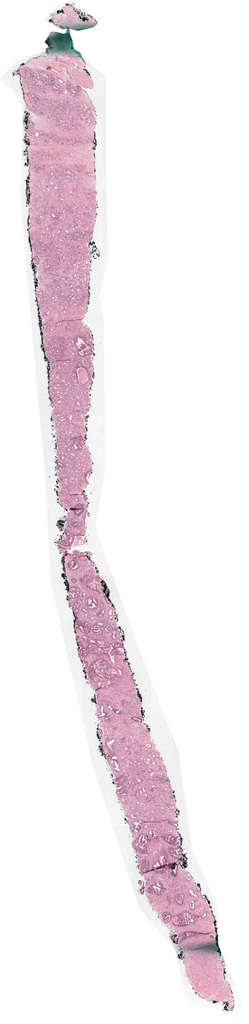

In [ ]:
wsi_test=openslide.OpenSlide('test/test/03426e9293f207de46b5592c001eb45c.tiff')
wsi_test.get_thumbnail((1024,1024))

In [ ]:
# wsi_label=openslide.OpenSlide('train_label_masks/train_label_masks/001c62abd11fa4b57bf7a6c603a11bb9.tiff')
# wsi_label.get_thumbnail((1024,1024))

#print all black image